# AgroUS

Machine learning project for predicting Production, Supply and Distribution of World Agricultural Commodities

Dmitriy Khodykin d.hodikin@yandex.ru

In [113]:
# imports
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn

## Import data

Returns a set of records with Forecast number for a given Commodity Code (Ex, 0440000 for Corn) and a given Market Year (Ex, 2017) for all applicable countries. PSD Database has data for most commodities since year 1960.

In [2]:
data = pandas.read_parquet('../data/data.parquet')

In [3]:
data.head()

,commodityCode,countryCode,marketYear,calendarYear,month,attributeId,unitId,value,commodityName,attributeName,unitDescription
0,0577400,GR,1990,1991,00,1,12,45400.0,"Almonds, Shelled Basis",Area Planted,(HA)
1,0577400,GR,1990,1991,00,4,12,41500.0,"Almonds, Shelled Basis",Area Harvested,(HA)
2,0577400,GR,1990,1991,00,17,10,15100.0,"Almonds, Shelled Basis",Bearing Trees,(1000 TREES)
3,0577400,GR,1990,1991,00,19,10,800.0,"Almonds, Shelled Basis",Non-Bearing Trees,(1000 TREES)
4,0577400,GR,1990,1991,00,16,10,15900.0,"Almonds, Shelled Basis",Total Trees,(1000 TREES)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1410644 entries, 0 to 1410643
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   commodityCode    1410644 non-null  object 
 1   countryCode      1410644 non-null  object 
 2   marketYear       1410644 non-null  object 
 3   calendarYear     1410644 non-null  object 
 4   month            1410644 non-null  object 
 5   attributeId      1410644 non-null  int64  
 6   unitId           1410644 non-null  int64  
 7   value            1410644 non-null  float64
 8   commodityName    1410644 non-null  object 
 9   attributeName    1410644 non-null  object 
 10  unitDescription  1410644 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 129.1+ MB


## Analytics data

In [5]:
data['commodityName'].value_counts()

Sugar, Centrifugal          75760
Cotton                      55770
Wheat                       55650
Corn                        55215
Coffee, Green               53375
                            ...  
Orange Juice                 4653
Mixed Grain                  2655
Oilseed, Soybean (Local)     1260
Meal, Soybean (Local)        1260
Oil, Soybean (Local)         1200
Name: commodityName, Length: 64, dtype: int64

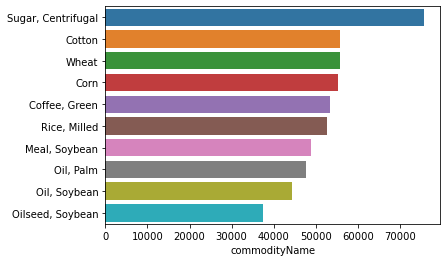

In [6]:
# Subset TOP-10 Commodities
top_10 = data['commodityName'].value_counts().head(10)

seaborn.barplot(
    x = top_10, 
    y = top_10.index
);

### Common Code

In [7]:
def show_plot(data, x_label, y_label, attribute_name):
    """
    Show seaborn barplot.
    """
    seaborn.lineplot(
        x = data[x_label], 
        y = data[y_label])
    plt.suptitle(f'{attribute_name}', 
                 fontsize=16)
    plt.xticks(rotation=90)
    plt.show();

### Oil, Palm

In [44]:
palm_oil = data[data['commodityName'] == 'Oil, Palm']
palm_oil.head()

,commodityCode,countryCode,marketYear,calendarYear,month,attributeId,unitId,value,commodityName,attributeName,unitDescription
719257,4243000,AF,1990,2006,06,1,4,0.0,"Oil, Palm",Area Planted,(1000 HA)
719258,4243000,AF,1990,2006,06,4,4,0.0,"Oil, Palm",Area Harvested,(1000 HA)
719259,4243000,AF,1990,2006,06,16,10,0.0,"Oil, Palm",Total Trees,(1000 TREES)
719260,4243000,AF,1990,2006,06,20,8,0.0,"Oil, Palm",Beginning Stocks,(1000 MT)
719261,4243000,AF,1990,2006,06,28,8,0.0,"Oil, Palm",Production,(1000 MT)


In [45]:
palm_oil_country_codes = set(palm_oil['countryCode'])
print(sorted(palm_oil_country_codes))

['AF', 'AG', 'AO', 'AS', 'AU', 'BE', 'BG', 'BM', 'BR', 'CA', 'CE', 'CG', 'CH', 'CM', 'CO', 'CS', 'DA', 'DJ', 'DM', 'DR', 'E2', 'E4', 'EC', 'EG', 'EI', 'ES', 'ET', 'FI', 'FR', 'GE', 'GH', 'GR', 'GT', 'GU', 'HA', 'HK', 'HO', 'ID', 'IN', 'IR', 'IT', 'IV', 'IZ', 'JA', 'JO', 'KE', 'KN', 'KS', 'KU', 'LI', 'MR', 'MU', 'MX', 'MY', 'MZ', 'NI', 'NL', 'NO', 'NZ', 'PE', 'PK', 'PL', 'PO', 'PP', 'RH', 'RP', 'RS', 'RW', 'SA', 'SF', 'SG', 'SL', 'SN', 'SP', 'SU', 'SW', 'SZ', 'TC', 'TH', 'TO', 'TS', 'TU', 'TW', 'TZ', 'UK', 'UP', 'US', 'VE', 'VM', 'YE', 'YM', 'YO', 'YS', 'ZZ']


In [48]:
palm_oil_attribute_names = set(palm_oil['attributeName'])
print(sorted(palm_oil_attribute_names))

['Area Harvested', 'Area Planted', 'Beginning Stocks', 'CY Exp. to U.S.', 'CY Exports', 'CY Imp. from U.S.', 'CY Imports', 'Domestic Consumption', 'Ending Stocks', 'Exports', 'Feed Waste Dom. Cons.', 'Food Use Dom. Cons.', 'Imports', 'Industrial Dom. Cons.', 'MY Exp. to EU', 'MY Imp. from EU', 'MY Imp. from U.S.', 'Production', 'Total Distribution', 'Total Supply', 'Total Trees', 'Yield']


In [70]:
# Subset TOP-10 countries
palm_oil_production = palm_oil[
    palm_oil['attributeName'] == 'Production'
]

palm_oil_grouped_by_country = palm_oil_production.groupby(['countryCode'])['value'].sum()
palm_oil_grouped_by_country_sorted = palm_oil_grouped_by_country.sort_values(ascending=False)
palm_oil_top_10_countries = palm_oil_grouped_by_country_sorted.head(10)

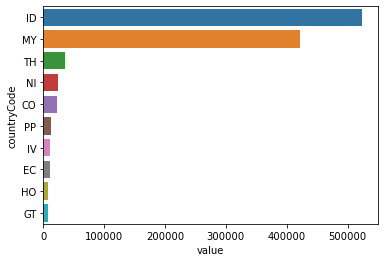

In [71]:
seaborn.barplot(
    x = palm_oil_top_10_countries, 
    y = palm_oil_top_10_countries.index
);

In [119]:
# Production in the Indonesia
palm_oil_production_id = data[(data['commodityName'] == 'Oil, Palm') & \
                              (data['attributeName'] == 'Production') & \
                              (data['countryCode'] == 'ID')] \
                              [['countryCode', 'marketYear', 'calendarYear', 
                                'month', 'value', 'unitDescription']]

In [76]:
palm_oil_production_id.sort_values('marketYear').tail()

,countryCode,marketYear,calendarYear,month,value,unitDescription
759191,ID,2015,2021,05,32000.0,(1000 MT)
760841,ID,2016,2021,05,36000.0,(1000 MT)
762513,ID,2017,2021,05,39500.0,(1000 MT)
764185,ID,2018,2021,05,41500.0,(1000 MT)
765857,ID,2019,2021,05,42500.0,(1000 MT)


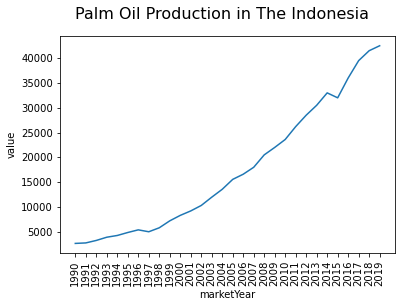

In [78]:
show_plot(
    palm_oil_production_id, 
    'marketYear', 
    'value',
    'Palm Oil Production in The Indonesia'
    )

In [83]:
# Ending Stocks in the Indonesia
palm_oil_ending_stocks_id = data[(data['commodityName'] == 'Oil, Palm') & \
                                 (data['attributeName'] == 'Ending Stocks') & \
                                 (data['countryCode'] == 'ID')] \
                                  [['countryCode', 'marketYear', 'calendarYear', 
                                    'month', 'value', 'unitDescription']]

In [84]:
palm_oil_ending_stocks_id.sort_values('marketYear').tail()

,countryCode,marketYear,calendarYear,month,value,unitDescription
759202,ID,2015,2021,05,2863.0,(1000 MT)
760852,ID,2016,2021,05,2110.0,(1000 MT)
762524,ID,2017,2021,05,3089.0,(1000 MT)
764196,ID,2018,2021,05,2909.0,(1000 MT)
765868,ID,2019,2021,05,4626.0,(1000 MT)


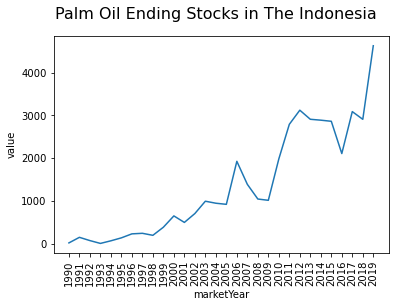

In [86]:
show_plot(
    palm_oil_ending_stocks_id, 
    'marketYear', 
    'value', 
    'Palm Oil Ending Stocks in The Indonesia'
    )

In [87]:
# Befining stocks
palm_oil_beginning_stocks_id = data[(data['commodityName'] == 'Sugar, Centrifugal') & \
                                    (data['attributeName'] == 'Beginning Stocks') & \
                                    (data['countryCode'] == 'US')] \
                                     [['countryCode', 'marketYear', 'calendarYear', 
                                       'month', 'value', 'unitDescription']]

In [88]:
palm_oil_beginning_stocks_id.sort_values('marketYear').tail()

,countryCode,marketYear,calendarYear,month,value,unitDescription
1327966,US,2015,2018,11,1642.0,(1000 MT)
1330366,US,2016,2021,05,1647.0,(1000 MT)
1332782,US,2017,2021,05,1863.0,(1000 MT)
1335198,US,2018,2021,05,1702.0,(1000 MT)
1337614,US,2019,2021,05,1822.0,(1000 MT)


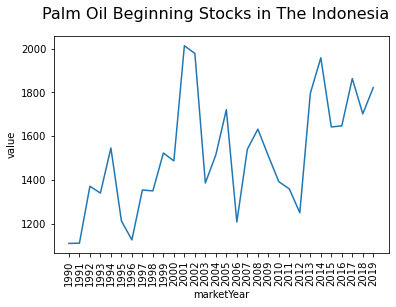

In [90]:
show_plot(
    palm_oil_beginning_stocks_id, 
    'marketYear', 
    'value', 
    'Palm Oil Beginning Stocks in The Indonesia'
    )

In [92]:
# Palm Oil in The Indonesia, all attributes
palm_oil_dataframe_id = data[(data['countryCode'] == 'ID') & \
                             (data['commodityName'] == 'Oil, Palm')] \
                              [['marketYear', 'attributeName', 'value']]

In [93]:
palm_oil_dataframe_id.tail()

,marketYear,attributeName,value
765870,2019,CY Imports,0.000
765871,2019,CY Imp. from U.S.,0.000
765872,2019,CY Exports,27000.000
765873,2019,CY Exp. to U.S.,980.000
765874,2019,Yield,3.617


In [94]:
# Market year as index
palm_oil_dataframe_id.index = palm_oil_dataframe_id['marketYear']
palm_oil_dataframe_id = palm_oil_dataframe_id.drop(['marketYear'], axis=1)

In [95]:
palm_oil_dataframe_id.tail()

,attributeName,value
marketYear,,
2019,CY Imports,0.000
2019,CY Imp. from U.S.,0.000
2019,CY Exports,27000.000
2019,CY Exp. to U.S.,980.000
2019,Yield,3.617


In [96]:
# Change AttributeName from rows to columns
palm_oil_dataframe_id = palm_oil_dataframe_id.pivot(columns='attributeName')

In [97]:
palm_oil_dataframe_id.tail()

value                                                \
attributeName Area Harvested Area Planted Beginning Stocks CY Exp. to U.S.   
marketYear                                                                   
2015                 10198.0          0.0           2889.0           754.0   
2016                 10600.0          0.0           2863.0           880.0   
2017                 11000.0          0.0           2110.0           975.0   
2018                 11300.0          0.0           3089.0           975.0   
2019                 11750.0          0.0           2909.0           980.0   

                                                                            \
attributeName CY Exports CY Imp. from U.S. CY Imports Domestic Consumption   
marketYear                                                                   
2015             22759.0               0.0        3.0               9120.0   
2016             27353.0               0.0        3.0               9125.0   
2017             27894.0               0.0        2.0              11555.0   
2018             29500.0               0.0       84.0              13485.0   
2019             27000.0               0.0        0.0              14545.0   

                                      ...                                \
attributeName Ending Stocks  Exports  ... Imports Industrial Dom. Cons.   
marketYear                            ...                                 
2015                 2863.0  22906.0  ...     0.0                3700.0   
2016                 2110.0  27633.0  ...     5.0                3500.0   
2017                 3089.0  26967.0  ...     1.0                5725.0   
2018                 2909.0  28279.0  ...    84.0                7450.0   
2019                 4626.0  26249.0  ...    11.0                8300.0   

                                                                          \
attributeName MY Exp. to EU MY Imp. from EU MY Imp. from U.S. Production   
marketYear                                                                 
2015                 3256.0             0.0               0.0    32000.0   
2016                 4044.0             0.0               0.0    36000.0   
2017                 3887.0             0.0               0.0    39500.0   
2018                 3900.0             0.0               0.0    41500.0   
2019                 3900.0             0.0               0.0    42500.0   

                                                                   
attributeName Total Distribution Total Supply Total Trees   Yield  
marketYear                                                         
2015                     34889.0      34889.0         0.0  3.1379  
2016                     38868.0      38868.0         0.0  3.3962  
2017                     41611.0      41611.0         0.0  3.5909  
2018                     44673.0      44673.0         0.0  3.6726  
2019                     45420.0      45420.0         0.0  3.6170  

[5 rows x 22 columns]

In [98]:
palm_oil_dataframe_id.shape

(30, 22)

In [99]:
# Drop extra index level in columns
palm_oil_dataframe_id = palm_oil_dataframe_id.droplevel(level=0, axis=1)

In [112]:
palm_oil_dataframe_id.columns

Index(['Area Harvested', 'Area Planted', 'Beginning Stocks', 'CY Exp. to U.S.',
       'CY Exports', 'CY Imp. from U.S.', 'CY Imports', 'Domestic Consumption',
       'Ending Stocks', 'Exports', 'Feed Waste Dom. Cons.',
       'Food Use Dom. Cons.', 'Imports', 'Industrial Dom. Cons.',
       'MY Exp. to EU', 'MY Imp. from EU', 'MY Imp. from U.S.', 'Production',
       'Total Distribution', 'Total Supply', 'Total Trees', 'Yield'],
      dtype='object', name='attributeName')

In [101]:
palm_oil_dataframe_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1990 to 2019
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area Harvested         30 non-null     float64
 1   Area Planted           30 non-null     float64
 2   Beginning Stocks       30 non-null     float64
 3   CY Exp. to U.S.        30 non-null     float64
 4   CY Exports             30 non-null     float64
 5   CY Imp. from U.S.      30 non-null     float64
 6   CY Imports             30 non-null     float64
 7   Domestic Consumption   30 non-null     float64
 8   Ending Stocks          30 non-null     float64
 9   Exports                30 non-null     float64
 10  Feed Waste Dom. Cons.  30 non-null     float64
 11  Food Use Dom. Cons.    30 non-null     float64
 12  Imports                30 non-null     float64
 13  Industrial Dom. Cons.  30 non-null     float64
 14  MY Exp. to EU          30 non-null     float64
 15  MY Imp. 

In [123]:
palm_oil_dataframe_id.tail()

attributeName,Area Harvested,Area Planted,Beginning Stocks,CY Exp. to U.S.,CY Exports,CY Imp. from U.S.,CY Imports,Domestic Consumption,Ending Stocks,Exports,...,Imports,Industrial Dom. Cons.,MY Exp. to EU,MY Imp. from EU,MY Imp. from U.S.,Production,Total Distribution,Total Supply,Total Trees,Yield
marketYear,,,,,,,,,,,,,,,,,,,,,
2015,10198.0,0.0,2889.0,754.0,22759.0,0.0,3.0,9120.0,2863.0,22906.0,...,0.0,3700.0,3256.0,0.0,0.0,32000.0,34889.0,34889.0,0.0,3.1379
2016,10600.0,0.0,2863.0,880.0,27353.0,0.0,3.0,9125.0,2110.0,27633.0,...,5.0,3500.0,4044.0,0.0,0.0,36000.0,38868.0,38868.0,0.0,3.3962
2017,11000.0,0.0,2110.0,975.0,27894.0,0.0,2.0,11555.0,3089.0,26967.0,...,1.0,5725.0,3887.0,0.0,0.0,39500.0,41611.0,41611.0,0.0,3.5909
2018,11300.0,0.0,3089.0,975.0,29500.0,0.0,84.0,13485.0,2909.0,28279.0,...,84.0,7450.0,3900.0,0.0,0.0,41500.0,44673.0,44673.0,0.0,3.6726
2019,11750.0,0.0,2909.0,980.0,27000.0,0.0,0.0,14545.0,4626.0,26249.0,...,11.0,8300.0,3900.0,0.0,0.0,42500.0,45420.0,45420.0,0.0,3.6170


### Distribution

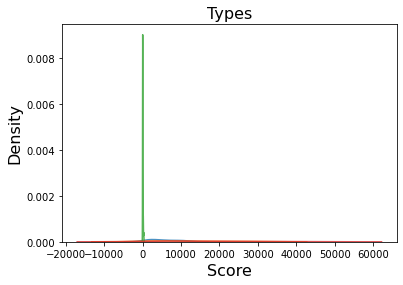

In [130]:
# Create a list of features

features = ['Area Harvested', 'Exports', 'Imports', 'Production']

for feature in features:
    subset = palm_oil_dataframe_id[feature]
    
    # Density plot
    seaborn.kdeplot(subset, label = feature, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Score', size = 16); plt.ylabel('Density', size = 16); 
plt.title('Types', size = 16);

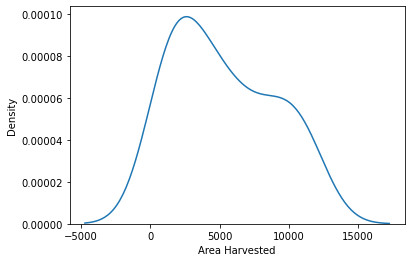

In [121]:
seaborn.kdeplot(palm_oil_dataframe_id['Area Harvested']);

### Relationship between some indicators

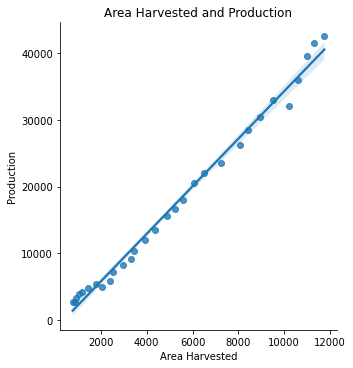

In [110]:
seaborn.lmplot(
    data=palm_oil_dataframe_id,
    x='Area Harvested',
    y='Production'
)
plt.title('Area Harvested and Production')
plt.show();

Very strong correlation between raw material collection area and oil production.

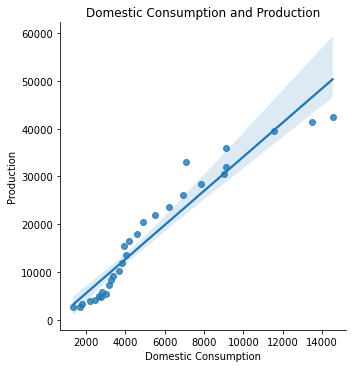

In [111]:
seaborn.lmplot(
    data=palm_oil_dataframe_id,
    x='Domestic Consumption',
    y='Production'
)
plt.title('Domestic Consumption and Production')
plt.show();

It looks like the domestic market is almost saturated.

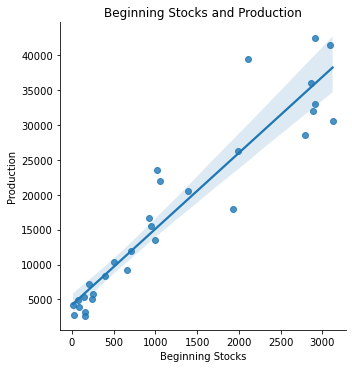

In [103]:
seaborn.lmplot(
    data=palm_oil_dataframe_id,
    x='Beginning Stocks',
    y='Production'
)
plt.title('Beginning Stocks and Production')
plt.show();

The market is actively growing, and the remainders are also growing.

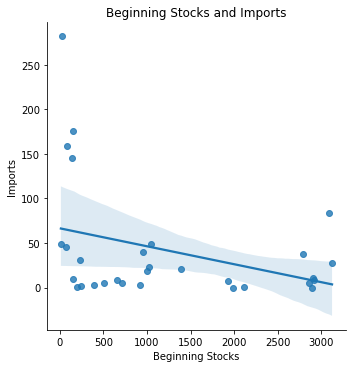

In [104]:
seaborn.lmplot(
    data=palm_oil_dataframe_id,
    x='Beginning Stocks',
    y='Imports'
)
plt.title('Beginning Stocks and Imports')
plt.show();

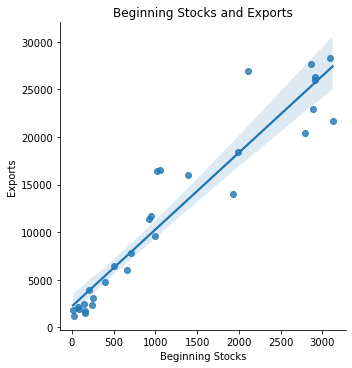

In [105]:
seaborn.lmplot(
    data=palm_oil_dataframe_id,
    x='Beginning Stocks',
    y='Exports'
)
plt.title('Beginning Stocks and Exports')
plt.show();

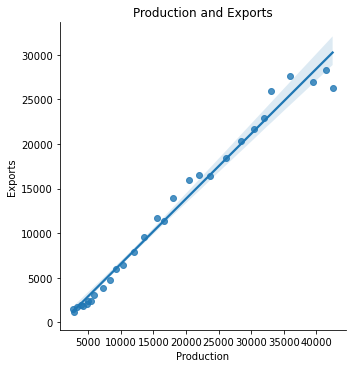

In [106]:
seaborn.lmplot(
    data=palm_oil_dataframe_id,
    x='Production',
    y='Exports'
)
plt.title('Production and Exports')
plt.show();

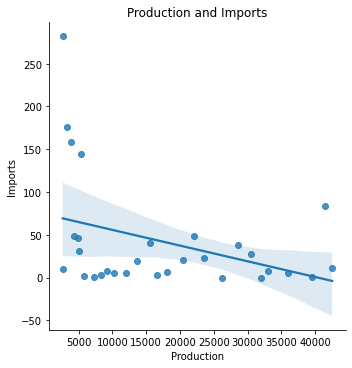

In [107]:
seaborn.lmplot(
    data=palm_oil_dataframe_id,
    x='Production',
    y='Imports'
)
plt.title('Production and Imports')
plt.show();

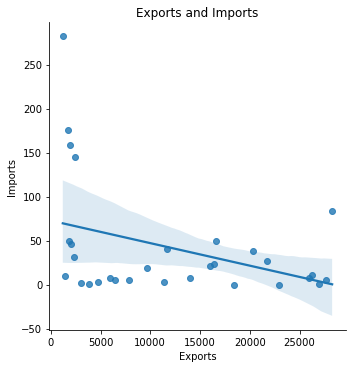

In [109]:
seaborn.lmplot(
    data=palm_oil_dataframe_id,
    x='Exports',
    y='Imports'
)
plt.title('Exports and Imports')
plt.show();

### Multicollinearity

In [114]:
print(
    'Matrix Shape:', palm_oil_dataframe_id.shape, '\n',
    'Matrix Rank:', numpy.linalg.matrix_rank(palm_oil_dataframe_id)
)

Matrix Shape: (30, 22) 
 Matrix Rank: 13
